# **MLFA LAb Test Question 2**

In [1]:
#Imports
import random
import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

In [2]:
#Use the last 5 digits of your roll number as the seed of the random number generator.
random.seed(30049)

In [3]:
#Helper Functions
def signfn(val):
  if val>=0:
    return 1
  else:
    return -1
    
#For outliers
def revsignfn(val):
  if val>=0:
    return -1
  else:
    return 1

In [4]:
#Question 2(A)
#Task: Choose a random 10D vector W, where each value lies between -1 and 1. Generate #N=100 datapoints (Xi, Yi) 
#such that Xi is a 10D vector whose elements lie between either (-10,-1) or (1,10), and Yi=sign(W.Xi). Basically you create a linearly separable dataset with wide margin.

W = list()
for i in range(10):
  W.append(random.uniform(-1,1))

W = np.asarray(W)
N = 100
dataset = list()
for i in range(N):
  Xi = list() #10 D vector
  for j in range(10):
    random_num = random.uniform(0,1)
    if random_num > 0.5:
      Xi.append(random.uniform(-10,-1))
    else:
      Xi.append(random.uniform(1,10))
  Yi = signfn(np.dot(W.T, Xi))
  dataset.append([Xi, Yi])
print(len(dataset))

100


In [13]:
# Question 2(B)
# Implement perceptron algorithm to find a separating hyperplane. 

# extract features X and targets Y from data
X = np.asarray([d[0] for d in dataset])
Y = np.asarray([d[1] for d in dataset])
      
def perceptron_algo(X, Y, lr=1):
    #initiliation
    dims = X.shape[0]  #X.shape[1] -> 10 (dims)
    w = np.zeros(X.shape[1]) #X.shape[1] -> 100 (N)
    updates = 0
    hasconverged = False
    iters = list()
    updates_per_iter = list()
    iter_num = 0
    while not hasconverged:
      iter_num+=1
      updates_this_iter=0
      hasconverged = True
      for i in range(dims):  
        if Y[i]*np.dot(w.T, X[i]) <= 0:
          hasconverged = False 
          updates_this_iter += 1         #increase count
          w += lr*Y[i]*X[i]
          if updates_this_iter >=50:
            hasconverged = True
            break                       #Force converge if num updates is high
      iters.append(iter_num)
      updates_per_iter.append(updates_this_iter)
    return iters, updates_per_iter

iters, updates_per_iter = perceptron_algo(X, Y)
print(iters)
print(updates_per_iter)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[19, 5, 5, 4, 6, 6, 7, 5, 4, 6, 7, 3, 5, 2, 7, 3, 4, 1, 0]


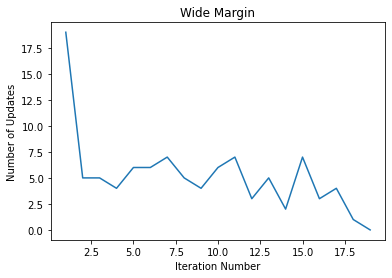

In [14]:
#Question 2(C)
#Task: Plot the number of updates you make in each iteration
plt.plot(iters, updates_per_iter)
plt.title('Wide Margin')
plt.xlabel('Iteration Number')
plt.ylabel('Number of Updates')
plt.show()

In [15]:
#Question 2(D)
#Task: Now, reduce the margin of the dataset by adding 10 points, whose features lie between
#between (-1,0) and (0,1). Labels are still generated as Yi=sign(W.Xi), i.e. the dataset is still linearly separable but now has narrower margin.

X_new_points = list(X)
Y_new_points = list(Y)

n=10
for i in range(n):
  Xi = list() #10 D vector
  for j in range(10):
    random_num = random.uniform(0,1)
    if random_num > 0.5:
      Xi.append(random.uniform(-1,0))
    else:
      Xi.append(random.uniform(0,1))
  Yi = signfn(np.dot(W.T, Xi))
  X_new_points.append(Xi)
  Y_new_points.append(Yi)

X_narrow = np.asarray(X_new_points)
Y_narrow = np.asarray(Y_new_points)

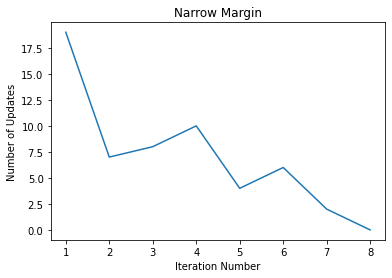

In [16]:
#Question 2(E)
# Task: Run the perceptron algorithm again and plot the number of updates in each iteration.
iters_narrow, updates_per_iter_narrow = perceptron_algo(X_narrow, Y_narrow)
plt.plot(iters_narrow, updates_per_iter_narrow)
plt.title('Narrow Margin')
plt.xlabel('Iteration Number')
plt.ylabel('Number of Updates')
plt.show()

In [17]:
#Question 2(F)
#Task: Add 5 “outliers” on both sides of W
X_with_outliers = list(X)
Y_with_outliers = list(Y)

n=5
for i in range(n):
  Xi = list() #10 D vector
  for j in range(10):
    random_num = random.uniform(0,1)
    if random_num > 0.5:
      Xi.append(random.uniform(-1,0))
    else:
      Xi.append(random.uniform(0,1))
  Yi = revsignfn(np.dot(W.T, Xi)) #adding reverse label for outliers
  X_with_outliers.append(Xi)
  Y_with_outliers.append(Yi)

X_with_outliers = np.asarray(X_with_outliers)
Y_with_outliers = np.asarray(Y_with_outliers)

In [ ]:
#Question 2(G)
#Task: Run the perceptron and plot the number of updates in each iteration
iters_out, updates_per_iter_out = perceptron_algo(X_with_outliers, Y_with_outliers)
plt.plot(iters_out, updates_per_iter_out)
plt.title('New Margin with outliers')
plt.xlabel('Iteration Number')
plt.ylabel('Number of Updates')
plt.show()